# BL40A2010 Introduction to IoT-Based Systems

## Assignment 3, 12.2.2023

### Author: Touko Tikkanen

**(1) Compute the following for a ring topology of $N=5$ and $N=6$  nodes considering that the network in unweighted and the links are directed. The result will give these number as a function of $N$.** ![](./ring.png) *Fig. 1 Example when $N=6$.* 

**N = 6:**

(a) Degree of nodes: All the nodes have a degree of 2 regardless of N.

(b) Adjacency matrix: Assuming that the nodes are numbered in order

$$
A = \begin{pmatrix} 
	0 & 1 & 0 & 0 & 0 & 0 \\
	0 & 0 & 1 & 0 & 0 & 0 \\
	0 & 0 & 0 & 1 & 0 & 0 \\
	0 & 0 & 0 & 0 & 1 & 0\\
	0 & 0 & 0 & 0 & 0 & 1 \\    
    1 & 0 & 0 & 0 & 0 & 0 
\end{pmatrix}
$$

(c) Diameter: 5, the graph being directed means having to traverse the whole graph to get to the furthest node -> N-1.

(d) Clustering coefficient of the nodes: 0 regardless of N, no triangular paths are present in the graph.


**N = 5:**

(a) Degree of nodes: 2 regardless of N

(b) Adjacency matrix:

$$
A = \begin{pmatrix} 
	0 & 1 & 0 & 0 & 0  \\
	0 & 0 & 1 & 0 & 0  \\
	0 & 0 & 0 & 1 & 0  \\
	0 & 0 & 0 & 0 & 1 \\
	1 & 0 & 0 & 0 & 0  
\end{pmatrix}
$$

(c) Diameter: N - 1 = 4

(d) Clustering coefficient of the nodes: 0 regardless of N

**(2) Use NetworkX to draw and analyze a ring topology with 5 nodes. Verify if the results previously obtained are valid.**

In [1]:
! pip install scikit-dsp-comm
! pip install --upgrade numpy
! pip install --upgrade matplotlib
! pip install --upgrade networkx

import networkx as nx 
import matplotlib.pyplot as plt 
import scipy as sp
import numpy as np

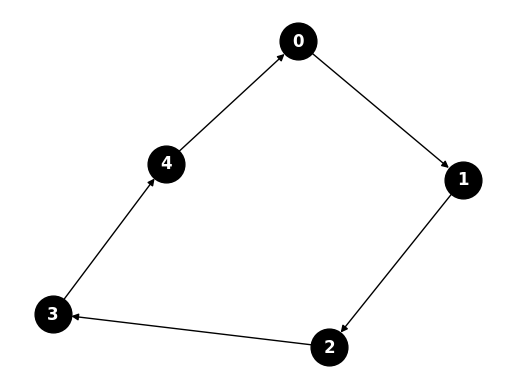

In [2]:
G = nx.Graph()

# 5 node undirected cycle graph
G = nx.cycle_graph(5)

# modify to directed graph and remove extra edges
G = G.to_directed() 

G.remove_edge(1, 0)
G.remove_edge(2, 1)
G.remove_edge(3, 2)
G.remove_edge(4, 3)
G.remove_edge(0, 4)

nx.draw_networkx(G, node_color='black', font_color='white', edge_color='black', font_weight='bold',  node_size=700)
plt.axis('off')
plt.show()

In [3]:
print("Node degrees: ", G.degree)
print("Adjacency matrix: ")
print(nx.adjacency_matrix(G).todense())
print("Diameter: ", nx.diameter(G))
print("Clustering coefficients: ", nx.clustering(G))

Node degrees:  [(0, 2), (1, 2), (2, 2), (3, 2), (4, 2)]
Adjacency matrix: 
[[0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [1 0 0 0 0]]
Diameter:  4
Clustering coefficients:  {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}


**(3) Analyze the ring topology with size 15 ($N=15$) as a communication network (i.e. how data travel to a point to another in the network) based on the node degree, the network diameter and the cluster coefficient.**

In the ring topology, each node is connected to two adjacent nodes, forming a ring. Communication to adjacent nodes requires traversing only a single edge, but possible confusion can happen between which of the two connected nodes the signal is coming from or which to send it to. However, if the graph is directed, it could be possible to have each node only receive signal from one node, and transmitting to another single node. Communication to further away nodes will require going through other nodes, which likely introduces noise to the signal at each node. Especially if network is directed, reaching the furthest node would require traversing the whole graph, in this case $N-1=14$ nodes. Since the cluster coefficient is $0$, removing edges easily compromises the network.

**(4) Consider the ring network from the previous question. The network performance depends on its diameter. As a designer, you can add one new node in the network (and an unlimited number of links that this node is part) . Justify your decision and evaluate how much better the network is. Generalize this finding as a function of $N$.**

*Hint:*  Follow Exercise 1 approach to generalize the finding.

I would add a central node that connects to all the other nodes ($N=16$). This would be a fusion between a ring and a star topology, with a node degree of $3$ for the ring nodes and degree of $N-1=15$ for the middle node. The benefit to this would be a much shorter diameter of $2$, since each node could be reached by going through the central node. The central node would face challenges in parsing all the incoming signals, but the ring nodes would be able to choose whether to send a signal through the crowded central node or the long chain of other ring nodes. This strength is reflected by the cluster coefficient being $0.67$ for the ring nodes and $2/(N-2) = 0.14$ for the central node.